In [1]:
!pip install matplotlib


[notice] A new release of pip is available: 25.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"C:\Users\rache\OneDrive\Documents\IS 362 - Flight Info.csv")

First I looked at the data from the cvs file to see what information may not be needed such as the zero values.

In [4]:
df.head()

,Unnamed: 0,Unnamed: 1,Los Angeles,Phoenix,San Diego,San Francisco,Seattle
0,ALASKA,on time,497.0,221,212.0,503.0,"1,841"
1,NaN,delayed,62.0,12,20.0,102.0,305
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AM WEST,on time,694.0,"4,840",383.0,320.0,201
4,NaN,delayed,117.0,415,65.0,129.0,61


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     2 non-null      object 
 1   Unnamed: 1     4 non-null      object 
 2   Los Angeles    4 non-null      float64
 3   Phoenix        4 non-null      object 
 4   San Diego      4 non-null      float64
 5   San Francisco  4 non-null      float64
 6   Seattle        4 non-null      object 
dtypes: float64(3), object(4)
memory usage: 412.0+ bytes


Dropping the empty rows and renaming the columns. Also replacing the NaN values with the correct airline information so everything looks cleaner.

In [6]:
df = df.rename(columns={'Unnamed: 0': 'Airline', 'Unnamed: 1': 'Status'})

df.dropna(how='all', inplace=True)

print(df)

   Airline   Status  Los Angeles Phoenix  San Diego  San Francisco Seattle
0   ALASKA  on time        497.0     221      212.0          503.0   1,841
1      NaN  delayed         62.0      12       20.0          102.0     305
3  AM WEST  on time        694.0   4,840      383.0          320.0     201
4      NaN  delayed        117.0     415       65.0          129.0      61


In [7]:
df["Airline"] = df["Airline"].ffill()
print(df)

   Airline   Status  Los Angeles Phoenix  San Diego  San Francisco Seattle
0   ALASKA  on time        497.0     221      212.0          503.0   1,841
1   ALASKA  delayed         62.0      12       20.0          102.0     305
3  AM WEST  on time        694.0   4,840      383.0          320.0     201
4  AM WEST  delayed        117.0     415       65.0          129.0      61


In [8]:
df_long = df.melt(id_vars=["Airline", "Status"],
                  var_name="Destination",
                  value_name="Flights")

df_long["Flights"] = df_long["Flights"].astype(str).str.replace(",", "", regex=False)
df_long["Flights"] = pd.to_numeric(df_long["Flights"]).astype(int)

print("\nLong format data:")
print(df_long.head(10))


Long format data:
   Airline   Status  Destination  Flights
0   ALASKA  on time  Los Angeles      497
1   ALASKA  delayed  Los Angeles       62
2  AM WEST  on time  Los Angeles      694
3  AM WEST  delayed  Los Angeles      117
4   ALASKA  on time      Phoenix      221
5   ALASKA  delayed      Phoenix       12
6  AM WEST  on time      Phoenix     4840
7  AM WEST  delayed      Phoenix      415
8   ALASKA  on time    San Diego      212
9   ALASKA  delayed    San Diego       20


Compare delayed and on time flights:

In [9]:
flight_status_comparison = df_long.groupby('Status')['Flights'].sum().reset_index()
print("Comparison of On-Time vs Delayed Flights:")
print(flight_status_comparison)

Comparison of On-Time vs Delayed Flights:
    Status  Flights
0  delayed     1288
1  on time     9712


Compare performance based on the airline and destination:

In [10]:
airline_summary = df_long.groupby(["Airline", "Status"])["Flights"].sum().unstack()
airline_summary["Total Flights"] = airline_summary["on time"] + airline_summary["delayed"]
airline_summary["On-Time %"] = (airline_summary["on time"] / airline_summary["Total Flights"]) * 100

print("\nAirline Performance:")
print(airline_summary)



Airline Performance:
Status   delayed  on time  Total Flights  On-Time %
Airline                                            
ALASKA       501     3274           3775  86.728477
AM WEST      787     6438           7225  89.107266


In [17]:
dest_summary = df_long.groupby(["Destination", "Airline", "Status"])["Flights"].sum().unstack().fillna(0)
dest_summary["Total Flights"] = dest_summary["on time"] + dest_summary["delayed"]
dest_summary["On-Time %"] = (dest_summary["on time"] / dest_summary["Total Flights"]) * 100

print("\nDestination Performance:")
print(dest_summary)



Destination Performance:
Status                 delayed  on time  Total Flights  On-Time %
Destination   Airline                                            
Los Angeles   ALASKA        62      497            559  88.908766
              AM WEST      117      694            811  85.573366
Phoenix       ALASKA        12      221            233  94.849785
              AM WEST      415     4840           5255  92.102759
San Diego     ALASKA        20      212            232  91.379310
              AM WEST       65      383            448  85.491071
San Francisco ALASKA       102      503            605  83.140496
              AM WEST      129      320            449  71.269488
Seattle       ALASKA       305     1841           2146  85.787512
              AM WEST       61      201            262  76.717557


Visualizations:

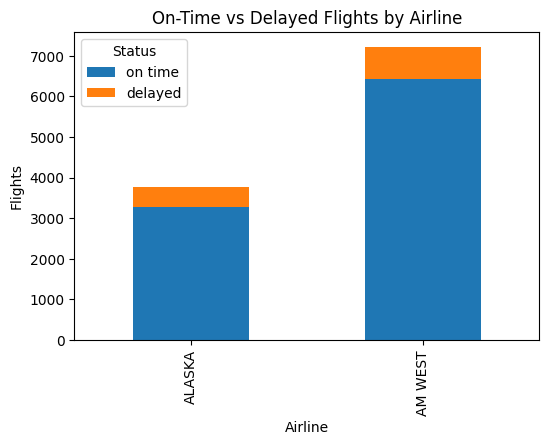

In [31]:
airline_summary[["on time", "delayed"]].plot(kind="bar", stacked=True, figsize=(6,4))
plt.title("On-Time vs Delayed Flights by Airline")
plt.ylabel("Flights")
plt.show()

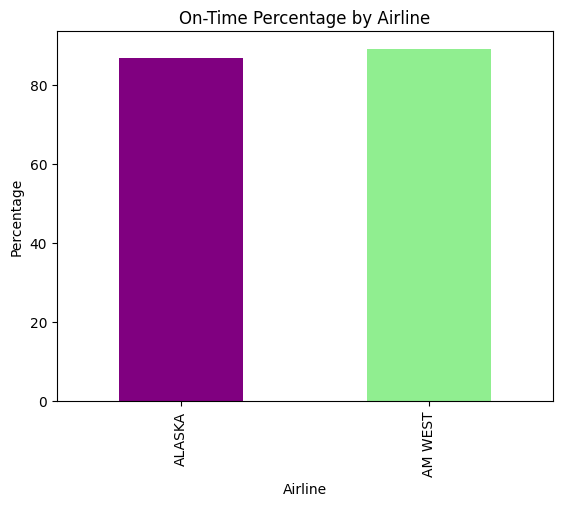

In [11]:
airline_summary["On-Time %"].plot(kind="bar", color=["purple", "lightgreen"])
plt.title("On-Time Percentage by Airline")
plt.ylabel("Percentage")
plt.show()

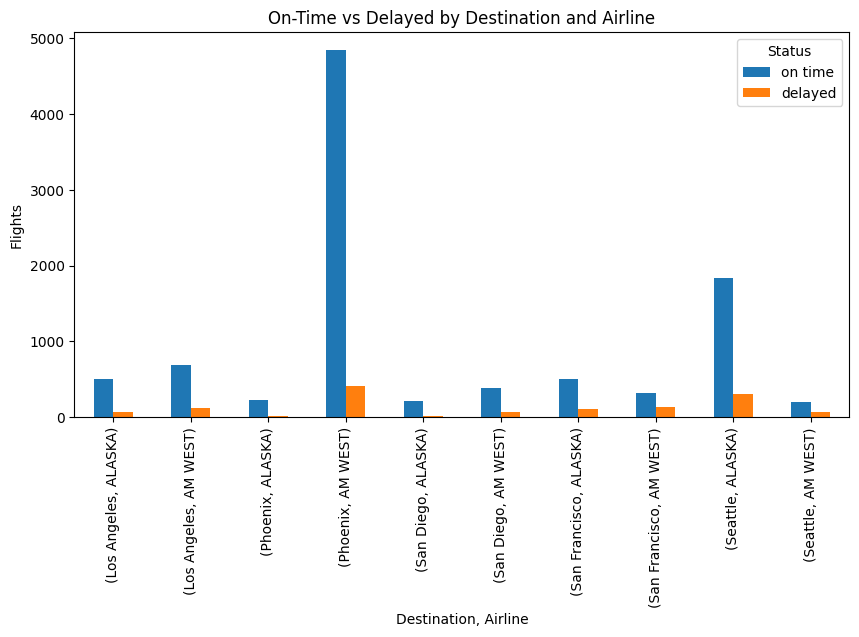

In [18]:
dest_summary[["on time", "delayed"]].plot(
    kind="bar", stacked=False, figsize=(10,5)
)

plt.title("On-Time vs Delayed by Destination and Airline")
plt.ylabel("Flights")
plt.xlabel("Destination, Airline")
plt.show()

**CONCLUSION**:

Overall, AM West has more on-time flights, with 89% of their flights arriving on time compared to Alaska, which had 86% on-time flights. However, in Seattle, Alaska had more on-time flights than AM West. Interestingly, AM West also had both the highest number of on-time flights and the highest number of delayed flights, with 6,438 on-time flights and 787 delayed flights. Overall, this shows that having more on-time flights does not necessarily mean an airline will have fewer delays.